<a href="https://colab.research.google.com/github/JuanGutierrezP/Juan_Guti-rrez-Joseph_Reyes/blob/main/Parcial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
#Punto 5
import sympy as sp

# Se hace el .symbols obligatoriamente
x = sp.symbols('x')

# Función de la ecuación de Rodrigues
def poli_laguerre(n):
    return sp.simplify (sp.exp(x) /sp.factorial(n)*sp.diff((x**n * sp.exp(-x)), x,n))

# for para que recorra y calcule los n = 1, 2, 3, 4, 5
for n in range(1, 6):
    # Obtenemos el polinomio de Laguerre
    L_n = poli_laguerre(n)
    print(f"L_{n}(X) =", L_n)



L_1(X) = 1 - x
L_2(X) = x**2/2 - 2*x + 1
L_3(X) = -x**3/6 + 3*x**2/2 - 3*x + 1
L_4(X) = x**4/24 - 2*x**3/3 + 3*x**2 - 4*x + 1
L_5(X) = -x**5/120 + 5*x**4/24 - 5*x**3/3 + 5*x**2 - 5*x + 1


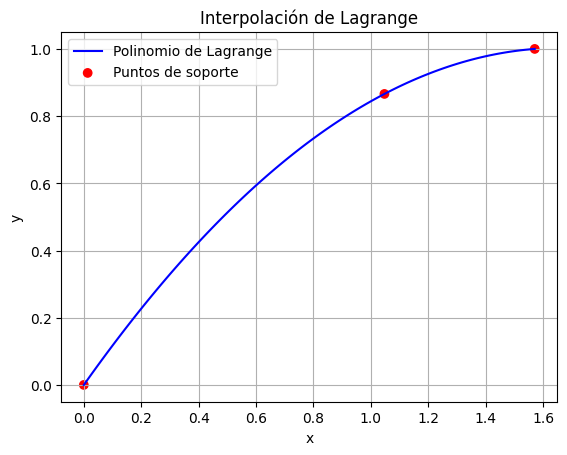

Valor estimado de sen(pi/8): 0.41820893444311996
Valor verdadero de sen(pi/8): 0.3826834323650898
Error de estimación: 0.03552550207803018
 Error teórico: 0.0193124810951803


In [ ]:
#Punto 7 Lagrange
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Punto A y punto C

# Definimos los puntos del conjunto de soporte
x_points = np.array([0, np.pi/3,np.pi/2])
y_points = np.sin(x_points)

# Función para el polinomio de Lagrange
def lagrange_poli(x, x_points, y_points):
    n = len(x_points)
    L = np.zeros_like(x, dtype=np.float64)

    for i in range(n):
        Li = np.ones_like(x, dtype=np.float64)
        for j in range(n):
            if i !=j:
                Li *= (x - x_points[j]) / (x_points[i] - x_points[j])
        L += y_points[i]*Li
    return L

# Graficamos el polinomio de Lagrange
x_vals = np.linspace(0, np.pi/2, 100)
y_vals = lagrange_poli(x_vals, x_points, y_points)

# Graficamos
plt.plot(x_vals, y_vals, label='Polinomio de Lagrange', color = "b")
plt.scatter(x_points, y_points, color='red', label='Puntos de soporte', linestyle="---")

plt.title('Interpolación de Lagrange')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()



#-----Punto b


# Valor de pi/8
x_estimate = np.pi / 8

#polinomio de Lagrange
y_estimado = lagrange_poli(np.array([x_estimate]), x_points, y_points)[0]

# Valor verdadero de sen(pi / 8)
y_true = np.sin(x_estimate)

# Error
error = np.abs(y_true - y_estimado)

print(f"Valor estimado de sen(pi/8): {y_estimado}")
print(f"Valor verdadero de sen(pi/8): {y_true}")
print(f"Error de estimación: {error}")

# Fórmula del error teórico de interpolación de Lagrange
def error_f(f_prime, x_values, x_eval):
    n = len(x_values) - 1
    xi = x_eval  # usaremos ξ = π/8
    error_term = f_prime(xi) / sp.factorial(n + 1)
    product_term = 1
    for x_i in x_values:
        product_term *= (x_eval - x_i)

    return error_term * product_term

# Cuarta derivada de sen(x) es sen(x)
f_prime_4 = np.sin

# Calculamos el error teórico
error_teor = error_f(f_prime_4, x_points, x_estimate)
print(f" Error teórico: {error_teor}")


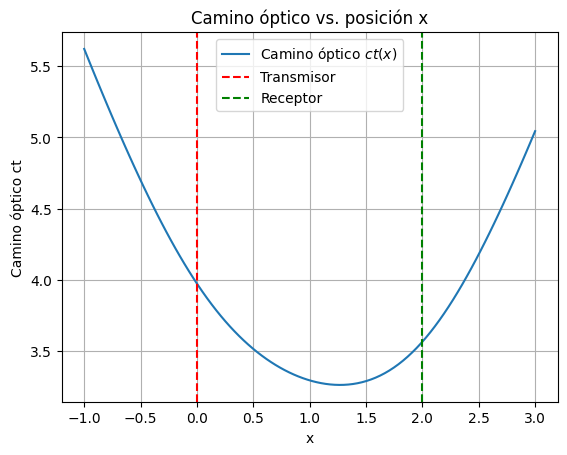

In [45]:
#B
import numpy as np
import matplotlib.pyplot as plt

# Constantes
n0 = 1
n1 = 1.33


T = np.array([0, 1])
R = np.array([2, 1])

# Función que calcula el camino óptico ct(x)
def optical_path(x, T, R, n0, n1):
    term1 = n0 * np.sqrt((x - T[0])**2 + T[1]**2)
    term2 = n1 * np.sqrt((x - R[0])**2 + R[1]**2)
    return term1 + term2

# Valores de x para graficar
x_val = np.linspace(-1, 3, 100)

# Calcular el camino óptico para cada x
ct_val = optical_path(x_val,T, R, n0, n1)

# Grafica el camino
plt.plot(x_val, ct_val, label="Camino óptico $ct(x)$")
plt.xlabel("x")
plt.ylabel("Camino óptico ct")
plt.title("Camino óptico vs. posición x")
plt.grid(True)
plt.axvline(x=0, color='r', linestyle='--', label='Transmisor')
plt.axvline(x=2, color='g', linestyle='--', label='Receptor')
plt.legend()
plt.show()




In [38]:
#C
import numpy as np

# Constantes
n0 = 1
n1 = 1.33
epsilon = 1e-9

# Coordenadas del transmisor (T) y receptor (R)
T = np.array([0, 1])  # Coordenadas del transmisor
R = np.array([2, 1])  # Coordenadas del barco

# Función
def optical(x, T, R, n0, n1):
    term1 = n0 * np.sqrt((x - T[0])**2 + T[1]**2)
    term2 = n1 * np.sqrt((x - R[0])**2 + R[1]**2)
    return term1 + term2

# primera derivada
def derivative(f, x, h=1e-5):
    return (f(x + h) - f(x - h)) / (2 * h)

# Método de Newton-Raphson para encontrar el mínimo
def newton_raphson(f, df, x0, tol):
    x = x0
    iteration = 0
    #while porque si no, da error(no es necesario)
    while abs(f(x)) >tol:
        iteration += 1
        x = x-f(x) /df(f, x)
        if iteration > 1000:  # Prevenir ciclos infinitos
            print("El método de Newton-Raphson no converge por tanto no sirve")
            break
    return x

# Función que queremos minimizar (la derivada de ct(x))
def f_derivada(x):
    return derivative(lambda x_val: optical_path(x_val, T, R, n0, n1), x)

# Derivada de la función (segunda derivada para el método de Newton-Raphson)
def df_derivada(f, x):
    return derivative(f, x)

# Inicialización
x0 = 1.0  # Valor inicial cercano al mínimo

# Encontrar el valor mínimo usando Newton-Raphson
xmin = newton_raphson(f_derivada, df_derivada, x0, epsilon)

print(f"El valor mínimo de x : {xmin}")




El valor mínimo de x : 1.268409213809215


In [42]:
#d
import numpy as np

# Coordenadas transmiso (T) y barco (R)
# Coordenadas del transmisor
T = np.array([0, 1])
# Coordenadas del barco
R = np.array([2, 1])

# El minimo gracias a Newton rapson del anterior punto
x_minimo=1.26840921

m0 = (T[1] - 0)/(T[0] -x_minimo)
alph_0 = np.arctan(1 /m0)

m1 =(R[1] - 0)/(R[0]-x_minimo)
alph_1 = np.arctan(1 / m1)

# pasar a grados
alph_0deg = np.degrees(alph_0)
alph_1deg = np.degrees(alph_1)

print(f"Ángulo de incidencia (α0): {alph_0deg} grados")
print(f"Ángulo de refracción (α1): {alph_1deg} grados")


Ángulo de incidencia (α0): -51.748138958001384 grados
Ángulo de refracción (α1): 36.188858667162165 grados


In [44]:
#e
import numpy as np

# Índices de refracción
n0 = 1
n1 = 1.33

# Angulos del punto D

alpha_0_deg= -51.748138958001384
alpha_1_deg= 36.188858667162165

# Convertir ángulos a radianes
alpha_0_rad = np.radians(alpha_0_deg)
alpha_1_rad= np.radians(alpha_1_deg)

# Verificar la Ley de Snell
snell_izq =n0 * np.sin(alpha_0_rad)
snell_dere =n1 * np.sin(alpha_1_rad)


print(f"n0 * sen(alpha_0): {snell_izq}")
print(f"n1 * sen(alpha_1): {snell_dere}")

# Mostrar si se cumple o no la Ley de Snell, si son suficentemete proximos los angulos calculados
if np.isclose(snell_izq, snell_dere, atol=1e-6):
    print("La ley de Snell se cumple")
else:
    print("La ley de Snell no se cumple")


n0 * sen(alpha_0): -0.7852968214837495
n1 * sen(alpha_1): 0.785296825063047
La ley de Snell no se cumple
